In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
from math import sqrt

In [25]:
data_frame = pd.read_csv("../one_year_data.csv")
data_frame = data_frame.iloc[:, 1:492]

In [26]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data_frame.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data_frame.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
X = np.where(np.isnan(data), 0, data)

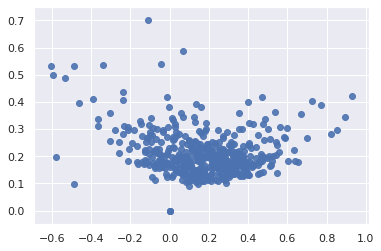

In [27]:
plt.scatter(X[:,0], X[:,1], alpha=0.9, edgecolors='b')

In [28]:
brc = Birch(branching_factor=50, n_clusters=3, threshold=.1)
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.1)

In [29]:
labels = brc.predict(X)

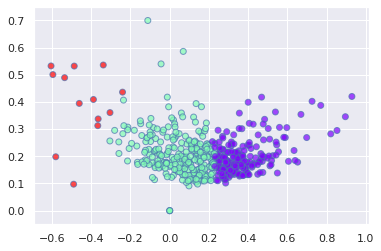

In [30]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')